<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [175]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'
import bs4
import requests
result = requests.get(url)
type(result.text) #confirms str

str

In [176]:
result #successful

<Response [200]>

In [177]:
type(result)

requests.models.Response

In [178]:
type(result.text) #confirms str

str

In [179]:
soup = bs4.BeautifulSoup(result.text)
soup.select('h2')
#print(soup) #dont do this

[<h2>
 <a href="/2018/schedule/presentation/127/" id="presentation-127">
         A Bit about Bytes: Understanding Python Bytecode
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/81/" id="presentation-81">
         Adapting from Spark to Dask: what to expect
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/152/" id="presentation-152">
         All in the timing: How side channel attacks work
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/84/" id="presentation-84">
         Analyzing Data: What pandas and SQL Taught Me About Taking an Average
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/96/" id="presentation-96">
         A practical guide to Singular Value Decomposition in Python
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/71/" id="presentation-71">
         Augmenting Human Decision Making with Data Science
       </a>
 </h2>, <h2>
 <a href="/2018/schedule/presentation/159/" id="presentation-159">
      

In [180]:
type(soup.select('h2'))

list

In [181]:
len(soup.select('h2')) #95 talks

95

In [182]:
first = soup.select('h2')[0] #first talk
first

<h2>
<a href="/2018/schedule/presentation/127/" id="presentation-127">
        A Bit about Bytes: Understanding Python Bytecode
      </a>
</h2>

In [183]:
first.text #cleaner but has problems

'\n\n        A Bit about Bytes: Understanding Python Bytecode\n      \n'

In [184]:
first.text.strip() #defaults to strip white spaces and newline parse

'A Bit about Bytes: Understanding Python Bytecode'

In [185]:
last = soup.select('h2')[-1] #last talk
print(type(last)) #tag
print(type(soup.select('h2')[-1:])) #list, not useful

<class 'bs4.element.Tag'>
<class 'list'>


In [186]:
#our complete list of titles loop style
titles = []
for tag in soup.select('h2'):
  tag.text.strip()
  titles.append(titles)
#list comp style
titles = [tag.text.strip() for tag in soup.select('h2')]
type(titles), len(titles)

(list, 95)

In [187]:
titles[0], titles[-1]

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [188]:
#nonfunctional compared to other methods
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
len(long_titles)

5

### 2. List Comprehension

In [201]:
long_titles = [title for title in titles if len(title) > 80]
len(long_titles)

5

### 3. Filter with named function

In [200]:
def long(title):
  return len(title) > 80
long('Hello') #False
list(filter(long, titles)) #filter by itself is an object

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [191]:
list(filter(lambda t: len(t)>80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [192]:
import pandas as pd
pd.options.display.max_colwidth = 200
df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [193]:
condition = df.title.str.len() > 80 #calls a Series of booleans
df[condition]
df.title.str.len() #calls a Series of ints equal to str.len

0      48
1      43
2      48
3      69
4      59
5      50
6      23
7      59
8      22
9      80
10     56
11     35
12     40
13     74
14     49
15     45
16     26
17     52
18     56
19     89
20     42
21     24
22     52
23     66
24     33
25     40
26     59
27     47
28    100
29     37
     ... 
65     35
66     43
67     60
68     30
69     32
70     25
71     56
72     37
73     34
74     49
75     50
76     19
77     14
78     84
79     40
80     34
81     37
82     74
83     57
84     40
85     37
86     38
87     23
88     65
89     56
90     38
91     32
92     64
93     38
94     47
Name: title, Length: 95, dtype: int64

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [197]:
df['title_length'] = df.title.apply(len)
df.head()

,title,title_length,description
0,A Bit about Bytes: Understanding Python Bytecode,48,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...
1,Adapting from Spark to Dask: what to expect,43,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin..."
2,All in the timing: How side channel attacks work,48,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ..."
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re..."
4,A practical guide to Singular Value Decomposition in Python,59,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ..."


In [202]:
df.loc[df['title_length']>80, 'title length']]

SyntaxError: ignored

### long title

In [203]:
#alt
df[df['long_title' == True]]

KeyError: ignored

### first letter

In [204]:
df['first_letter'] = df.title.str[0]
df.head()

df[df['first_letter'] == 'P']

,title,title_length,description,long_title,first_letter
55,Performance Python: Seven Strategies for Optimizing Your Numerical Code,71,"Python provides a powerful platform for working with data, but often the most straightforward data analysis can be painfully slow. When used effectively, though, Python can be as fast as even comp...",False,P
56,Pipenv: The Future of Python Dependency Management,50,"This talk is about the history of Python packaging, the tools that have been historically available for application deployment, the problems/constraints presented by them, and presents a holistic ...",False,P
57,Practical Sphinx,16,"Each member of your project team uses something different to document\r\ntheir work -- RestructuredText, Markdown, and Jupyter Notebooks. How do\r\nyou combine all of these into useful documentati...",False,P
58,Programming microbes using Python,33,"The genome of a typical microbe contains roughly 5 million base pairs of DNA including > 4000 genes, which provide the instructions for cellular replication, energy metabolism, and other biologica...",False,P
59,Pumping up Python modules using Rust,36,"If youâve spent much time writing (or debugging) Python performance problems, youâve probably had a hard time managing memory with its limited language support. \r\n\r\nIn this talk, we ventur...",False,P
60,Python 2 to 3: How to Upgrade and What Features to Start Using,62,The end of life for Python 2 is 2020. Python 3 is the future and you'll need to consider both your upgrade plan and what steps you'll take after upgrading to start leveraging Python 3 features.\r\...,False,P
61,Python 3: ten years later,25,"Looking back at Python evolutions over the last 10 years.\r\n\r\nPython 3.0 was released ten years ago (December 2008). It's time to look back: analyze the migration from Python 2 to Python 3, see...",False,P
62,Python across the USA: This is the Bus.,39,"For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...",False,P
63,Python Data Sonification for Science and Discovery,50,"What do geiger counters, black holes, heart monitors, and volcanoes have in common? They all can use sound to convey information! This talk will explore using python for sonification: the process...",False,P
64,Python for the quantum computing age,36,Quantum computers are slowly turning in to reality more than 30 years after they were first theorized. The need for quantum computers have become clear as we reach the limits of Mooreâs law and ...,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [205]:
!pip install textstat

In [206]:
import textstat
first = df.title.values[0]
last = df.title.values[-1]
first, last
textstat.lexicon_count(first), textstat.lexicon_count(last)

(7, 9)

In [207]:
df['title_word_count'] = df.title.apply(textstat.lexicon_count)
df[df['title_word_count'] <= 3]

,title,title_length,description,long_title,first_letter,title_word_count
6,Automating Code Quality,23,"Writing quality Python code can be both tough and tedious. On top of the general design, there are many code quality aspects that you need to watch out for when writing and reviewing code such as ...",False,A,3
8,Behavior-Driven Python,22,"Behavior-Driven Development (BDD) is gaining popularity as an improved way to collaborate over product features and tests. In Python, **behave** is one of the leading BDD test frameworks. Using **...",False,B,2
21,Coding through Adversity,24,"In 2017, I was released from prison after serving 17 years. One of the most transformational experiences I had while incarcerated was learning to code, through a pioneering new program called Code...",False,C,3
52,Love your bugs,14,"Wrestling bugs can be one of the most frustrating parts of programming - but with the right framing, bugs can also be our best allies. I'll tell the tales of two of my favorite bugs, including the...",False,L,3
57,Practical Sphinx,16,"Each member of your project team uses something different to document\r\ntheir work -- RestructuredText, Markdown, and Jupyter Notebooks. How do\r\nyou combine all of these into useful documentati...",False,P,2
76,Taking Django Async,19,"The Django Channels project has taken a major turn with version 2.0, embracing Python's async functionality and building applications around an async event loop rather than worker processes.\r\n\r...",False,T,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [208]:
df['title_character_count'] = df['title_length']
df.head()
#alt
df = df.rename(columns={'title_legth': 'title_cha'})
df.columns

Index(['title', 'title_length', 'description', 'long_title', 'first_letter',
       'title_word_count', 'title_character_count'],
      dtype='object')

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [209]:
import numpy as np
df.describe(exclude=np.number)

,title,description,long_title,first_letter
count,95,95,95,95
unique,95,95,2,21
top,The Journey Over the Intermediate Gap,"Occasionally weâll find that some bit of Python weâve written doesnât run as fast as weâd like, what can we do? Performance bottlenecks arenât always intuitive or easy to spot by reading...",False,P
freq,1,1,90,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [210]:
df.sort_values(by='title_character_count').head()

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count
52,Love your bugs,14,"Wrestling bugs can be one of the most frustrating parts of programming - but with the right framing, bugs can also be our best allies. I'll tell the tales of two of my favorite bugs, including the...",False,L,3,14
77,The AST and Me,14,Get under the hood and learn about Python's beloved Abstract Syntax Tree. Ever wonder how Python code is run? Overheard people arguing about whether Python is interpreted or compiled? In this talk...,False,T,4,14
57,Practical Sphinx,16,"Each member of your project team uses something different to document\r\ntheir work -- RestructuredText, Markdown, and Jupyter Notebooks. How do\r\nyou combine all of these into useful documentati...",False,P,2,16
76,Taking Django Async,19,"The Django Channels project has taken a major turn with version 2.0, embracing Python's async functionality and building applications around an async event loop rather than worker processes.\r\n\r...",False,T,3,19
44,HOWTO Write a Function,22,A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...,False,H,4,22


Five shortest titles, by character count

In [211]:
df['first_letter'] = df['first_letter'].str.upper()
df.sort_values(by='first_letter', ascending=False).head()

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count
94,You're an expert. Here's how to teach like one.,47,"Knowing how to code and being able to teach it are two separate skills. When we have expertise in a subject, it's common to take for granted that we'll be able to effectively communicate our exper...",False,Y,9,47
93,Win back lovely API: GraphQL in Python,38,"RESTful has been the go-to choice of API world. Why another API approach? To support more data-driven applications, to provide more flexibility and ease unnecessary code and calls, to address a wi...",False,W,7,38
91,What is a Python Core Developer?,32,How do you become a Python core developer? How can I become one? What is it like to be a Python core developer?\r\n\r\nThese are the questions I often receive ever since I became a Python core dev...,False,W,6,32
90,Visual Testing with PyCharm and pytest,38,"Know you should be doing testing but havenât gotten over the hurdle to learn it? pytest is Pythonâs modern, friendly, and powerful testing framework. When paired with an IDE, testing gets a vi...",False,V,6,38
89,Visualizing Algorithms with Python and Programmable LEDs,56,"Recently, a new LED strip specification, APA102, has been released which allows these strips to be driven by a general purpose CPU instead of a dedicated microcontroller. This allows us the luxury...",False,V,7,56


Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [212]:
df['first_letter'].value_counts().sort_index()

"     1
A     7
B    11
C     8
D     7
E     5
F     3
G     2
H     5
I     2
L     3
O     2
P    12
R     3
S     6
T    11
U     2
V     2
W     2
Y     1
Name: first_letter, dtype: int64

In [213]:
df[df['first_letter']=='""']

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count


Percentage of talks with long titles

In [214]:
df['long_title'].value_counts()/len(df)
#alt
df['long_title'].value_counts(normalize=True)*100

False    94.736842
True      5.263158
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

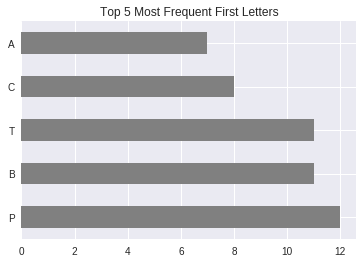

In [215]:
%matplotlib inline
(df['first_letter'].value_counts().head()
 .plot.barh(color='grey', title='Top 5 Most Frequent First Letters'));
#suppress subplot object with ;


Histogram of title lengths, in characters

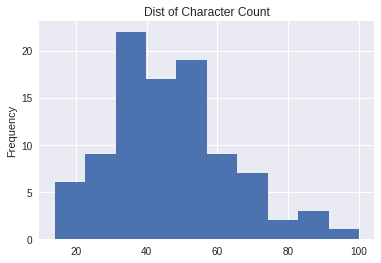

In [216]:
title = 'Dist of Character Count'
df['title_character_count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [218]:
description = [tag.text.strip() for tag in soup.select('.presentation-description')]
df['description'] = description
df.head(2)

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count
0,A Bit about Bytes: Understanding Python Bytecode,48,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,False,A,7,48
1,Adapting from Spark to Dask: what to expect,43,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",False,A,8,43


In [219]:
df['desc_character_count'] = df.description.apply(len)
df['desc_word_count'] = df.description.apply(textstat.lexicon_count)
df.head(2)

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count,desc_character_count,desc_word_count
0,A Bit about Bytes: Understanding Python Bytecode,48,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,False,A,7,48,440,78
1,Adapting from Spark to Dask: what to expect,43,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",False,A,8,43,881,141


In [220]:
textlist = []
indexno = 0
for index in df['description']:
  x = textstat.flesch_kincaid_grade(df['description'][indexno])
  textlist.append(x)
  indexno = indexno+1
df['desc_gradelv'] = textlist
df.head(2)

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count,desc_character_count,desc_word_count,desc_gradelv
0,A Bit about Bytes: Understanding Python Bytecode,48,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,False,A,7,48,440,78,7.4
1,Adapting from Spark to Dask: what to expect,43,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",False,A,8,43,881,141,14.3


In [221]:
import numpy as np
df.describe(exclude=np.number)

,title,description,long_title,first_letter
count,95,95,95,95
unique,95,95,2,20
top,The Journey Over the Intermediate Gap,"Occasionally weâll find that some bit of Python weâve written doesnât run as fast as weâd like, what can we do? Performance bottlenecks arenât always intuitive or easy to spot by reading...",False,P
freq,1,1,90,12


In [222]:
df.describe(include=np.number)
#min desc word count - 35
#max desc word count - 436
#mean desc word count - 134.6

,title_length,title_word_count,title_character_count,desc_character_count,desc_word_count,desc_gradelv
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,46.442105,7.189474,46.442105,846.063158,134.578947,18.117895
std,17.560664,2.903757,17.560664,450.107713,70.019082,15.835652
min,14.000000,2.000000,14.000000,201.000000,35.000000,3.700000
25%,35.000000,5.000000,35.000000,550.000000,91.500000,10.500000
50%,45.000000,7.000000,45.000000,758.000000,119.000000,13.800000
75%,56.000000,9.000000,56.000000,978.000000,149.500000,17.950000
max,100.000000,19.000000,100.000000,2794.000000,436.000000,107.800000


In [223]:
df = df[df['desc_character_count'] <= 280]
df.head()
#df includes only descriptions that would be tweetable

,title,title_length,description,long_title,first_letter,title_word_count,title_character_count,desc_character_count,desc_word_count,desc_gradelv
44,HOWTO Write a Function,22,A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...,False,H,4,22,231,49,3.7
62,Python across the USA: This is the Bus.,39,"For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...",False,P,8,39,201,35,15.8
65,"Python, Locales and Writing Systems",35,"Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up....",False,P,5,35,262,45,6.8


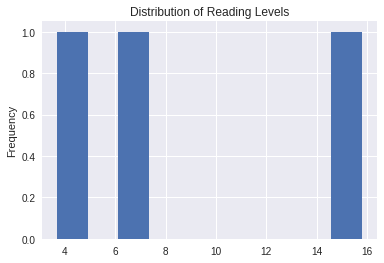

In [225]:
%matplotlib inline
title = 'Distribution of Reading Levels'
ax = df['desc_gradelv'].plot.hist(title=title)